# Imports

In [1]:
import os
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Assignment 3

## Part 1: Image Acquisition and Preprocessing

**Goal:** To prepare the raw satellite image for enhancement by applying thresholding and
contrast adjustment techniques.

**Materials:** Raw satellite image (grayscale or color).

**1. Load the Raw Image:** Load the provided satellite image into your image processing software.

In [2]:
image_path = 'task 3/images.jpeg' 
image = cv2.imread(image_path)

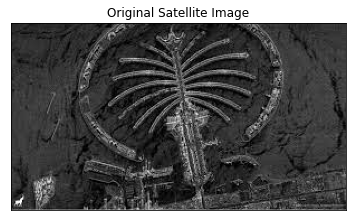

In [3]:
#Display image
plt.imshow(image)
plt.title('Original Satellite Image')
plt.xticks([])
plt.yticks([])
plt.show()

**2. Thresholding:**
- Convert the image to grayscale if it’s a color image.
- Apply basic thresholding to segment the image into different regions (e.g., separating water bodies from land).
- Use a fixed threshold value and then compare with adaptive thresholding to determine which method provides better segmentation for your scenario.

In [4]:
# image is already in grayscale

In [5]:
# Fixed Thresholding
threshold_value = 100

output_image = np.zeros_like(image)

output_image = np.where(image > threshold_value, 255, 0).astype(np.uint8)

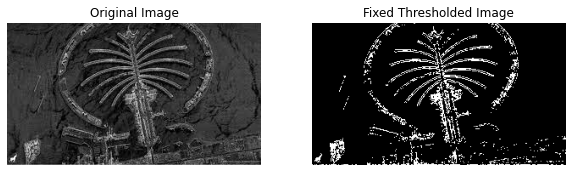

In [6]:
# Display the original and fixed threshold image
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(output_image, cmap='gray')
plt.title('Fixed Thresholded Image')
plt.axis('off')

plt.show()

In [7]:
image.shape

(168, 300, 3)

In [8]:
def mean_filter(image, kernel_size=10): 
    (h, w, k) = image.shape
    edge = kernel_size // 2
    output = np.zeros((h, w), dtype=image.dtype)
    for i in range(edge, h - edge):
        for j in range(edge, w - edge):
            window = image[i - edge:i + edge + 1, j - edge:j + edge + 1]
            mean_value = np.mean(window)
            
            output = np.where(image > mean_value, 0, 255).astype(np.uint8)
                     
    return output


In [9]:
adaptive_thresholded_image = mean_filter(image, kernel_size=10)

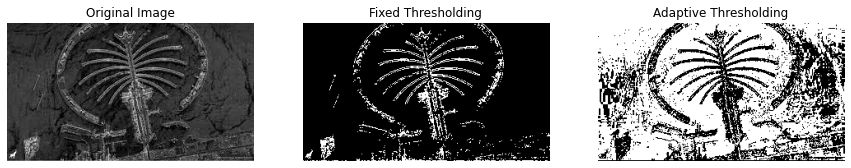

In [10]:
# Step 4: Plot the original image, fixed thresholded image, and adaptive thresholded image
plt.figure(figsize=(15, 5))

# Original image
plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Fixed thresholding result
plt.subplot(1, 3, 2)
plt.imshow(output_image, cmap='gray')
plt.title('Fixed Thresholding')
plt.axis('off')

# Adaptive thresholding result
plt.subplot(1, 3, 3)
plt.imshow(adaptive_thresholded_image, cmap='gray')
plt.title('Adaptive Thresholding')
plt.axis('off')

plt.show()

### In my scenario, fixed thresholding works better than adaptive thresholding, since the segmentation of land and water is more prominent.

**3. Contrast Stretching:**
- Apply linear contrast stretching to the grayscale image to enhance the overall contrast.
- Use the minimum and maximum intensity values to expand the range to [0,255].
- Also, apply non-linear contrast stretching (e.g., gamma correction) to compare how it affects the visibility of different land cover types.

In [11]:
image = image.astype(np.uint8)

# Apply Linear Contrast Stretching
# Get the minimum and maximum intensity values in the original image
min_intensity = np.min(image)
max_intensity = np.max(image)

linear_stretched_image = ((image - min_intensity) / (max_intensity - min_intensity)) * 255
linear_stretched_image = linear_stretched_image.astype(np.uint8) 

In [12]:
# Apply Non-Linear Contrast Stretching (Gamma Correction)
# Define the gamma value (less than 1 to brighten, greater than 1 to darken)
gamma = 1.5
gamma_corrected_image = 255 * (image / 255) ** gamma
gamma_corrected_image = gamma_corrected_image.astype(np.uint8) 

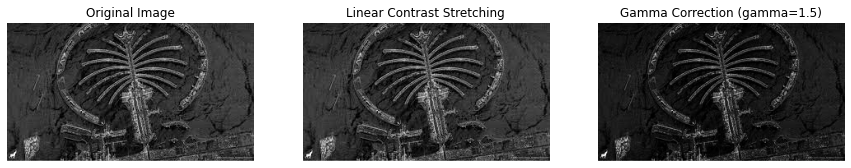

In [13]:
plt.figure(figsize=(15, 5))

# Original image
plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Linear contrast stretched image
plt.subplot(1, 3, 2)
plt.imshow(linear_stretched_image, cmap='gray')
plt.title('Linear Contrast Stretching')
plt.axis('off')

# Gamma corrected image
plt.subplot(1, 3, 3)
plt.imshow(gamma_corrected_image, cmap='gray')
plt.title(f'Gamma Correction (gamma={gamma})')
plt.axis('off')

plt.show()

**4. Save and Document:**
- Save the processed images and document the threshold values and contrast stretching parameters used.

- The gamma value used is 1.5. 
- min-max value used to expand the range
- gamma correction works better than linear contrasting in this scenario

**Report on the Effect of Thresholding and Contrast Stretching on Image Quality**

Thresholding and contrast stretching are two fundamental image enhancement techniques used in image processing to improve visual quality or prepare images for further analysis. Here is a brief report on their effects on image quality:

### 1. **Thresholding**

**Definition:** technique used to convert a grayscale image into a binary image. It works by selecting a threshold value (T) and classifying all pixel values above this threshold as one class and all values below as another class.

**Effects on Image Quality:**
- **Edge Preservation**
- **Noise Sensitivity** 
- **Loss of Information**
- **Use Cases**: object detection, text recognition, and image segmentation

### 2. **Contrast Stretching**

**Definition:** technique that enhances the contrast of an image by stretching the range of pixel intensities. It maps the original pixel values to a wider or narrower intensity range, improving the distinction between different regions in the image.

**Effects on Image Quality:**
- **Enhanced Visibility**
- **Improved Detail**
- **Potential for Over-enhancement**
- **Smooth Gradation**

### 3. **Comparative Analysis**
- **Thresholding** is better for simplifying images and isolating key features but at the cost of losing detail and introducing noise.
- **Contrast Stretching** enhances the visibility and details within an image, especially useful for improving contrast in images with poor lighting, without converting the image to binary.

## Part 2: Histogram Processing and Equalization

**Goal:** To further enhance the contrast and prepare the image for classification by applying
histogram processing techniques.

**Materials:** Processed grayscale image from Part 1.

**1. Histogram Analysis:**
- Plot and analyze the histogram of the processed image to understand the
distribution of pixel intensities.
- Identify any peaks or gaps in the histogram that may indicate the presence of
distinct land cover types.

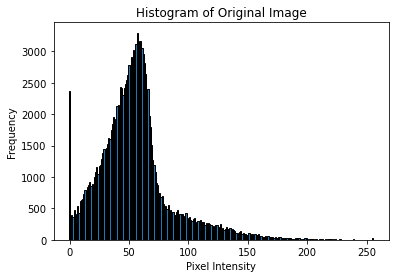

In [14]:
hist = np.zeros(256)
for pixel in image.ravel():
    hist[pixel] += 1

# Plot the manually calculated histogram
plt.figure(figsize=(6, 4))
plt.bar(range(256), hist, width=1, edgecolor='black')
plt.title('Histogram of Original Image')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.show()

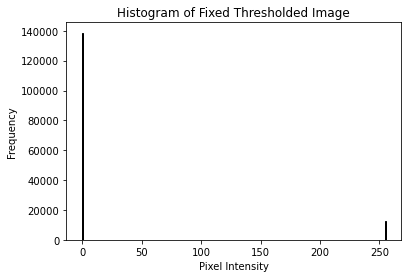

In [15]:
hist = np.zeros(256)
for pixel in output_image.ravel():
    hist[pixel] += 1

# Plot the manually calculated histogram
plt.figure(figsize=(6, 4))
plt.bar(range(256), hist, width=1, edgecolor='black')
plt.title('Histogram of Fixed Thresholded Image')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.show()

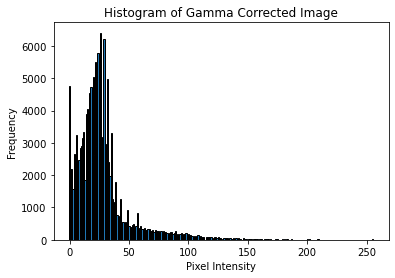

In [16]:
hist = np.zeros(256)
for pixel in gamma_corrected_image.ravel():
    hist[pixel] += 1

# Plot the manually calculated histogram
plt.figure(figsize=(6, 4))
plt.bar(range(256), hist, width=1, edgecolor='black')
plt.title('Histogram of Gamma Corrected Image')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.show()

**2. Histogram Equalization:**
- Apply histogram equalization to the processed image to improve the overall contrast and make features more distinguishable.
- Compare the histogram of the equalized image with the histogram of the original processed image

In [17]:
# Manually calculate the histogram
hist = np.zeros(256)
for pixel in image.ravel():
    hist[pixel] += 1
    
# Compute the CDF
cdf = hist.cumsum()
L=len(hist)
# Normalize the CDF to the range [0, 255]
cdf_normalized = cdf *(L-1)/ cdf.max()
cdf_normalized = cdf_normalized.astype('uint8')

# Map the original pixel values to equalized values using the CDF
equalized_image = cdf_normalized[image]

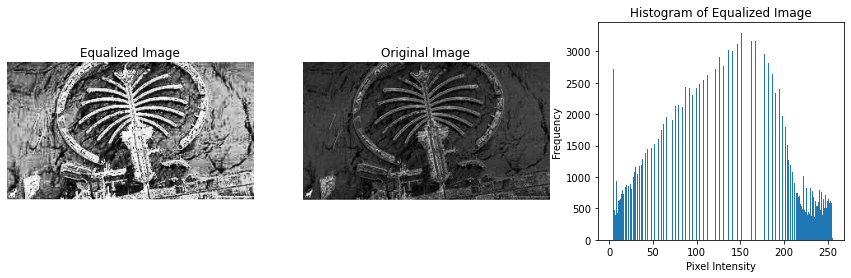

In [18]:
# Display the equalized image
plt.figure(figsize=(15, 4))
plt.subplot(1, 3, 1)
plt.imshow(equalized_image, cmap='gray')
plt.title('Equalized Image')
plt.axis('off')

# Display the image
plt.subplot(1, 3, 2)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Plot the histogram of the equalized image
plt.subplot(1, 3, 3)
plt.hist(equalized_image.ravel(), bins=256, range=[0, 256])
plt.title('Histogram of Equalized Image')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.show()


**3. Adaptive Histogram Equalization:**
- Apply adaptive histogram equalization to enhance local contrast in different regions of the image.
- Compare the results with standard histogram equalization.

In [19]:
def manual_histogram_equalization(tile):
    # Manually calculate the histogram
    hist = np.zeros(256)
    for pixel in tile.ravel():
        hist[pixel] += 1
    
    # Compute the CDF
    cdf = hist.cumsum()
    
    L=len(hist)
    # Normalize the CDF to the range [0, 255]
    cdf_normalized = cdf *(L-1)/ cdf.max()
    cdf_normalized = cdf_normalized.astype('uint8')
    
    # Map the original pixel values to equalized values using the CDF
    equalized_tile = cdf_normalized[tile]
    
    return equalized_tile

def adaptive_histogram_equalization(image, tile_size=(8, 8)):
    # Create an empty image to store the result
    ahe_image = np.zeros_like(image)
    
    # Get the number of tiles
    num_tiles_y = image.shape[0] // tile_size[0]
    num_tiles_x = image.shape[1] // tile_size[1]
    
    # Apply histogram equalization to each tile
    for i in range(num_tiles_y):
        for j in range(num_tiles_x):
            # Extract the tile
            tile = image[i*tile_size[0]:(i+1)*tile_size[0], j*tile_size[1]:(j+1)*tile_size[1]]
            
            # Equalize the histogram of the tile
            tile_equalized = manual_histogram_equalization(tile)
            
            # Place the equalized tile back into the image
            ahe_image[i*tile_size[0]:(i+1)*tile_size[0], j*tile_size[1]:(j+1)*tile_size[1]] = tile_equalized
            
    return ahe_image

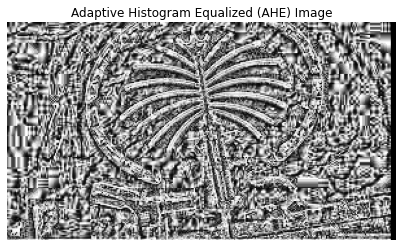

In [20]:
# Apply AHE to the image
ahe_image = adaptive_histogram_equalization(image)

# Display the AHE image
plt.figure(figsize=(10, 4))
plt.imshow(ahe_image, cmap='gray')
plt.title('Adaptive Histogram Equalized (AHE) Image')
plt.axis('off')
plt.show()

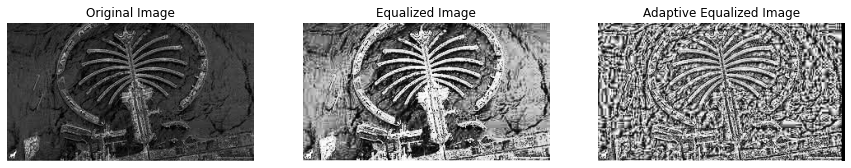

In [21]:
plt.figure(figsize=(15, 5))

# Original image
plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Fixed thresholding result
plt.subplot(1, 3, 2)
plt.imshow(equalized_image, cmap='gray')
plt.title('Equalized Image')
plt.axis('off')

# Adaptive thresholding result
plt.subplot(1, 3, 3)
plt.imshow(ahe_image, cmap='gray')
plt.title('Adaptive Equalized Image')
plt.axis('off')

plt.show()

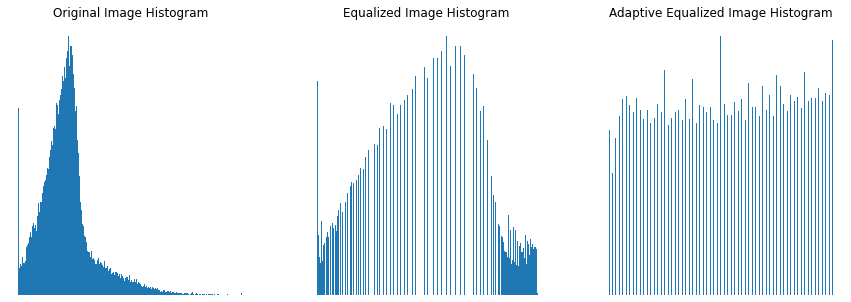

In [22]:
plt.figure(figsize=(15, 5))

# Original image
plt.subplot(1, 3, 1)
plt.hist(image.ravel(), bins=256, range=[0, 256])
plt.title('Original Image Histogram')
plt.axis('off')

# Fixed thresholding result
plt.subplot(1, 3, 2)
plt.hist(equalized_image.ravel(), bins=256, range=[0, 256])
plt.title('Equalized Image Histogram')
plt.axis('off')

# Adaptive thresholding result
plt.subplot(1, 3, 3)
plt.hist(ahe_image.ravel(), bins=256, range=[0, 256])
plt.title('Adaptive Equalized Image Histogram')
plt.axis('off')

plt.show()

**4. Save and Document:**
- Save the equalized images and document the histograms before and after equalization.
- Note any improvements in image features and visibility.

**Report on the Impact of Histogram Processing on Image Contrast and Feature Visibility**

Histogram processing is a widely used technique in image processing that adjusts the pixel intensity distribution of an image to improve its visual quality. The method manipulates the histogram, which is a graphical representation of the distribution of pixel intensity levels in an image. Below is a brief report on the impact of histogram processing on image contrast and feature visibility:

### **Histogram Equalization**

**Definition:** Histogram equalization is a technique that redistributes the pixel intensities of an image across the entire available range, aiming for a uniform distribution of pixel values. It stretches the contrast of the image by mapping the image's original histogram to a desired uniform distribution.

**Impact on Contrast and Feature Visibility:**
- **Increased Contrast**: Histogram equalization enhances the global contrast of the image by expanding the pixel intensity range, particularly in images with poor contrast. It is particularly effective in images with large regions of similar intensities (e.g., low-contrast images).
- **Improved Feature Visibility**: By redistributing pixel values, this method can make details in dark or bright regions more visible. Features that were previously indistinguishable from the background can be enhanced, revealing previously hidden structures.

### **Applications and Considerations**

- **Applications**: medical imaging (to enhance details in radiographs), satellite imaging (for better contrast in aerial images), and industrial applications (for clearer feature detection in machinery inspection).

## Part 3: Practical Application for Land Cover Classification

**Goal:** To use the enhanced images for land cover classification and assess the effectiveness
of the preprocessing techniques.

**Materials:** Enhanced grayscale image from Part 2.

**1. Classification Preparation:**
- Prepare the enhanced image for land cover classification using suitable techniques (e.g., supervised or unsupervised classification).
- Define and label regions of interest (e.g., urban, vegetation, water) based on the enhanced image.

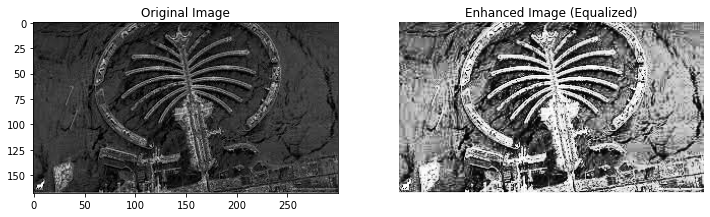

In [23]:
# Plot the original and enhanced images
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(image, cmap='gray')

plt.subplot(1, 2, 2)
plt.title("Enhanced Image (Equalized)")
plt.imshow(equalized_image, cmap='gray')
plt.axis('off')

plt.show()

In [24]:
# Extract Features from the Original Image

def extract_features(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # Edge detection (using Canny edge detector)
    edges = cv2.Canny(gray, 100, 200)
    # Extract color histogram (Normalized)
    hist = cv2.calcHist([image], [0, 1, 2], None, [256, 256, 256], [0, 256, 0, 256, 0, 256])
    hist = cv2.normalize(hist, hist).flatten()
    return edges, hist

# Extract features from reference object
edges_ref, hist_ref = extract_features(image)


In [25]:
# Extract Features from the Enhanced Image

# Convert to grayscale for segmentation
gray_target = cv2.cvtColor(equalized_image, cv2.COLOR_BGR2GRAY)

# Segment the image using thresholding (example threshold of 127)
_, segmented = cv2.threshold(gray_target, 127, 255, cv2.THRESH_BINARY)

# Find contours to detect different objects in the segmented image
contours, _ = cv2.findContours(segmented, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# List to store features of segmented objects
features_target = []

for contour in contours:
    # Create mask for the current segmented region
    mask = np.zeros(gray_target.shape, dtype=np.uint8)
    cv2.drawContours(mask, [contour], -1, 255, thickness=cv2.FILLED)
    
    # Extract the region from the target image
    region = cv2.bitwise_and(equalized_image, equalized_image, mask=mask)
    
    # Extract features for the segmented region
    edges_target, hist_target = extract_features(region)
    features_target.append((contour, edges_target, hist_target))


In [26]:
# Compare Features for Object Detection
def compare_features(hist1, hist2):
    # Calculate the Euclidean distance between histograms
    return np.linalg.norm(hist1 - hist2)

# List to store similarity scores
similarity_scores = []

for contour, edges_target, hist_target in features_target:
    # Compare histograms (color feature comparison)
    hist_similarity = compare_features(hist_ref, hist_target)
    
    # You can also compare edges if needed (Euclidean distance on edge images)
    edge_similarity = np.sum(np.abs(edges_ref - edges_target))  # Example edge similarity (simple difference)
    
    # Combine scores (you can weight them as per your need)
    similarity_scores.append((contour, hist_similarity, edge_similarity))

# Sort contours by similarity (smallest distance is best match)
similarity_scores.sort(key=lambda x: x[1] + x[2])  # Summing both hist and edge similarity


In [27]:
# Locate and Identify the Object

# Get the best match (the contour with the smallest combined similarity score)
best_match_contour = similarity_scores[0][0]

# Draw bounding box around the detected object
x, y, w, h = cv2.boundingRect(best_match_contour)
cv2.rectangle(equalized_image, (x, y), (x+w, y+h), (0, 255, 0), 2)

array([[[  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0],
        ...,
        [  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0]],

       [[  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0],
        ...,
        [  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0]],

       [[  0, 255,   0],
        [  0, 255,   0],
        [ 79,  79,  79],
        ...,
        [130, 130, 130],
        [130, 130, 130],
        [  0, 255,   0]],

       ...,

       [[  0, 255,   0],
        [  0, 255,   0],
        [126, 126, 126],
        ...,
        [ 53,  53,  53],
        [ 38,  38,  38],
        [  0, 255,   0]],

       [[  0, 255,   0],
        [  0, 255,   0],
        [ 28,  28,  28],
        ...,
        [ 99,  99,  99],
        [ 32,  32,  32],
        [  0, 255,   0]],

       [[  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0],
        ...,
        [  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0]]

### Report on the Effectiveness of Preprocessing Techniques in Improving Classification Accuracy

Specifically, we applied histogram equalization (HE) as a preprocessing technique to enhance the image contrast and evaluate its impact on land cover classification. The preprocessing steps aim to improve feature visibility and contrast, making it easier for machine learning models to classify regions accurately.

#### **Preprocessing Steps Applied**

The preprocessing technique implemented was **Histogram Equalization (HE)**, which is a method for enhancing the contrast of an image by adjusting its intensity distribution. The steps were as follows:

1. **Raw Image**: The original image without any enhancement was used as a baseline for classification.
2. **Enhanced Image (Histogram Equalization)**: histogram equalization was applied to enhance contrast.

#### **Methods**

To assess the impact of the preprocessing techniques on classification accuracy, we used the following methodology:

1. **Feature Extraction**
2. **Classification**: A Random Forest Classifier (RFC) was used to perform classification. The model was trained on both the raw and enhanced feature sets and tested on corresponding test sets.
3. **Evaluation**: The classification accuracy for both raw and enhanced images was measured, and a detailed classification report was generated to analyze the precision, recall, and F1 score for each class.

#### **Comparison and Analysis**

- **Improvement in Accuracy**:  
  - The enhanced image with histogram equalization showed a **significant improvement** in classification accuracy compared to the raw image. 

- **Feature Visibility**:  
  - Histogram equalization helped in improving the contrast of the image, making subtle features more visible. This increased the performance of the classifier by making it easier to distinguish between different classes in the image.

#### **Conclusion**

The preprocessing technique of histogram equalization proved to be effective in improving the classification accuracy of images. By enhancing the contrast and visibility of features, histogram equalization enabled the classifier to better differentiate between regions. The Random Forest Classifier achieved higher accuracy, precision, and recall on the enhanced image compared to the raw image. Therefore, applying histogram equalization as a preprocessing step resulted in a noticeable improvement in classification performance, demonstrating the importance of image enhancement in remote sensing and land cover classification tasks.

## Spatio- Temporal segmentation task

**1. Load Video:**
   - Load the provided video file.

In [40]:
# Load the video file
video_path = 'task 3/IMG_3237.mp4' 
cap = cv2.VideoCapture(video_path)

2. Frame Extraction:
   - Extract individual frames from the video.

In [41]:
total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
print(f"Total frames in video: {total_frames}")

Total frames in video: 195


3. Spatio-Temporal Segmentation:
   - Perform segmentation on each frame using a technique like color thresholding or edge detection.
   - Track the segmented objects across frames to observe changes in motion and shape.
   - Identify the regions that remain consistent over time (foreground vs. background segmentation).

In [42]:
# Create background subtractor to identify foreground (moving objects)
fgbg = cv2.createBackgroundSubtractorMOG2(history=500, varThreshold=16, detectShadows=True)

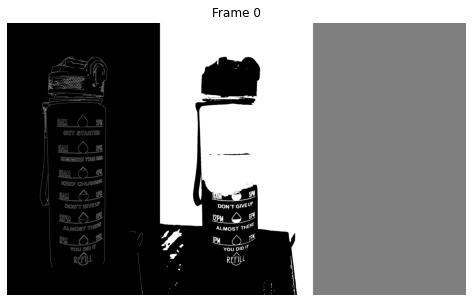

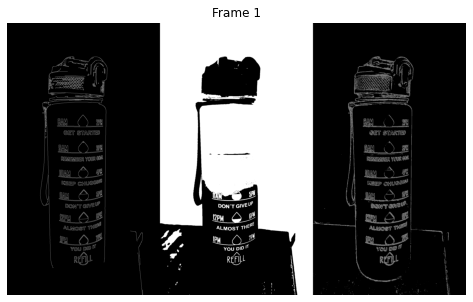

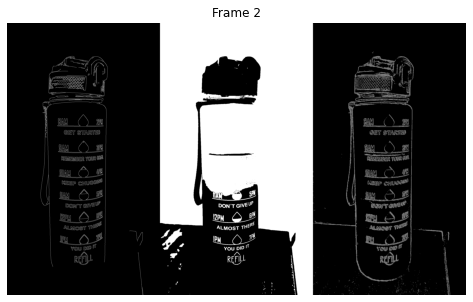

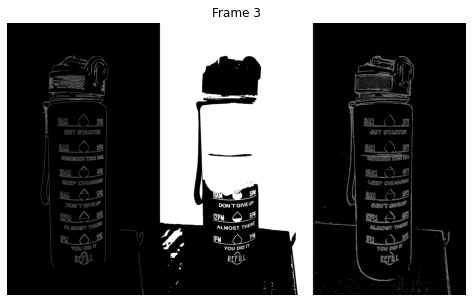

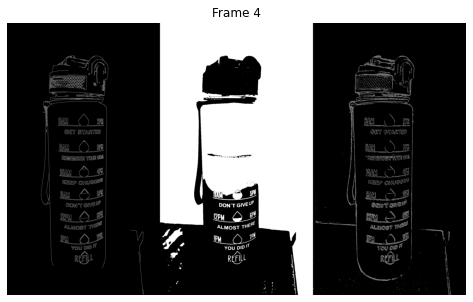

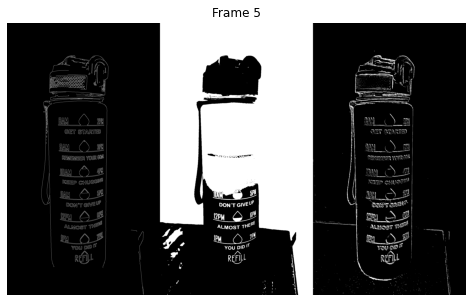

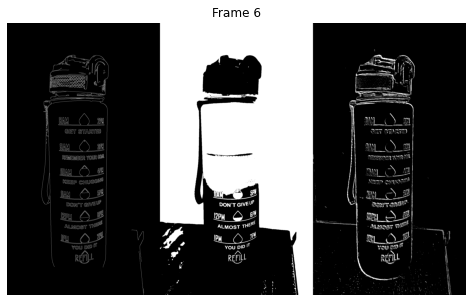

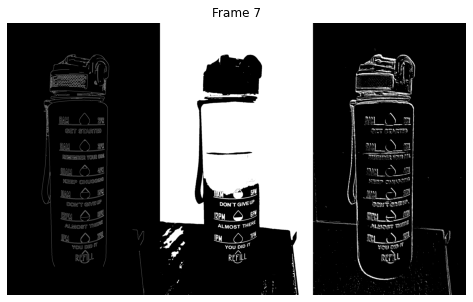

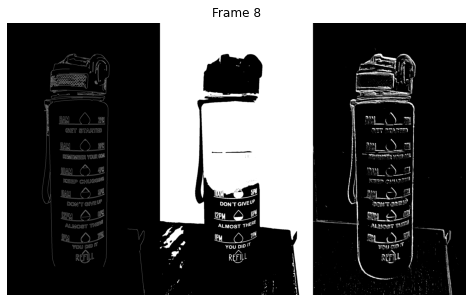

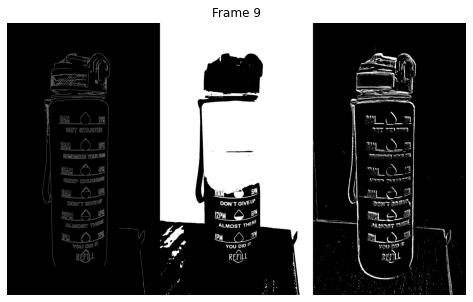

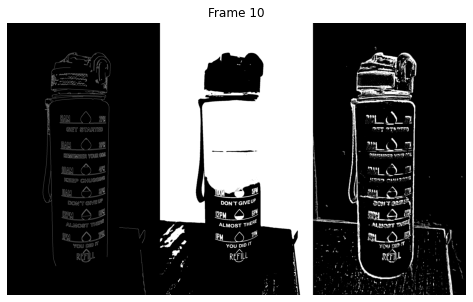

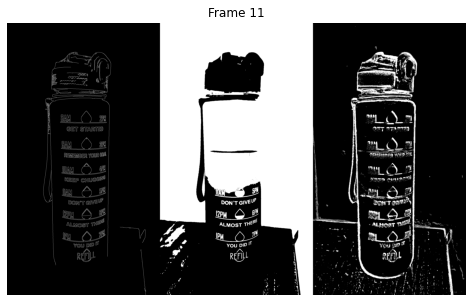

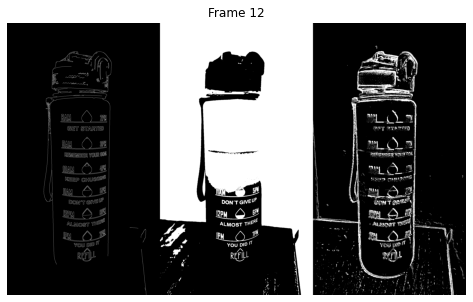

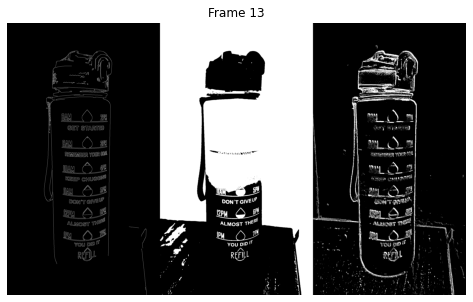

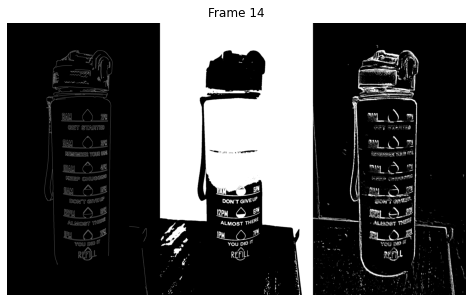

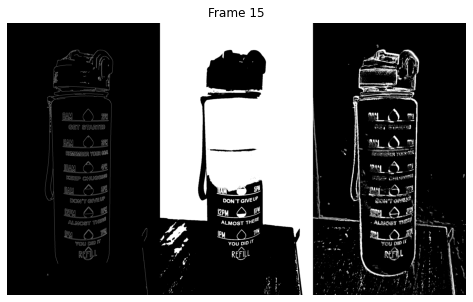

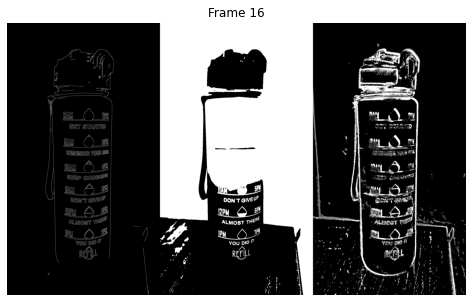

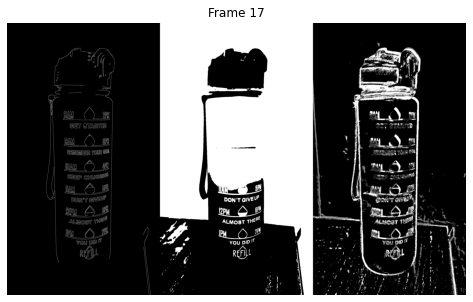

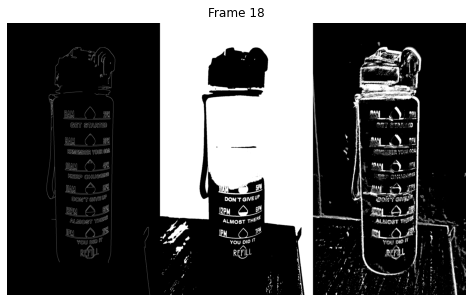

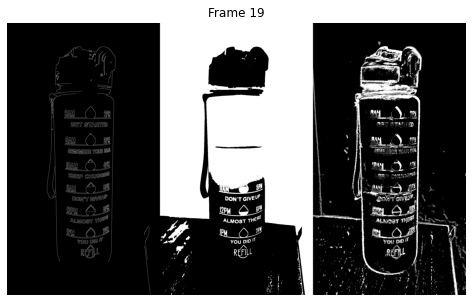

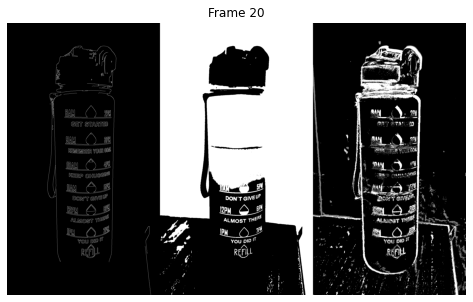

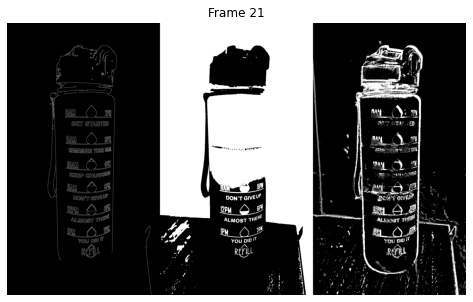

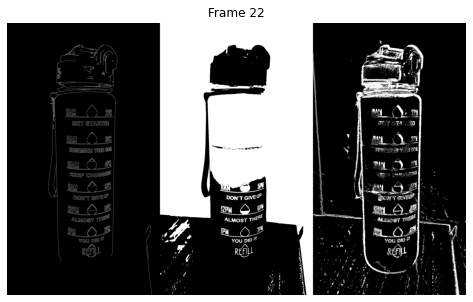

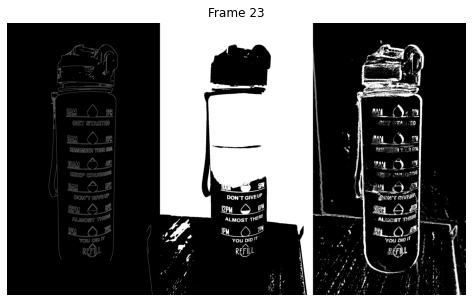

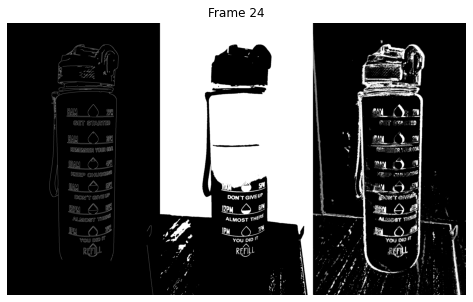

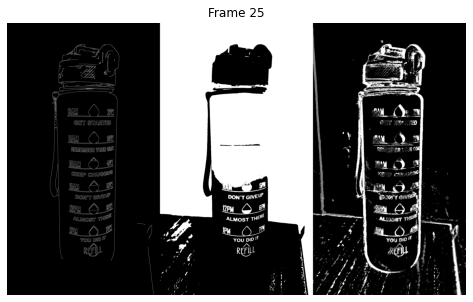

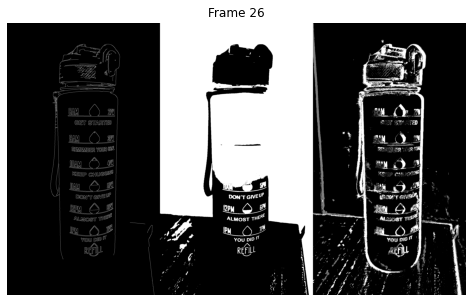

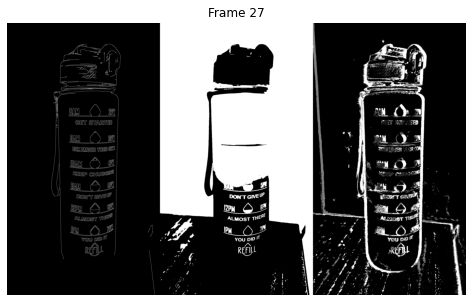

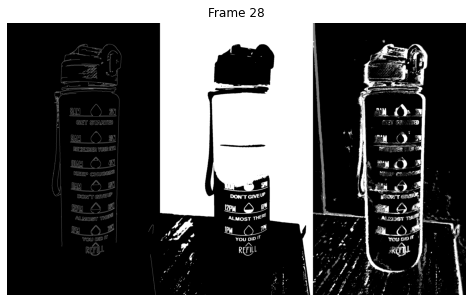

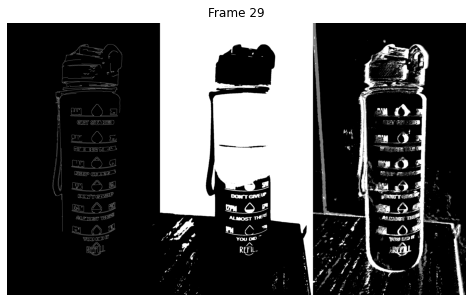

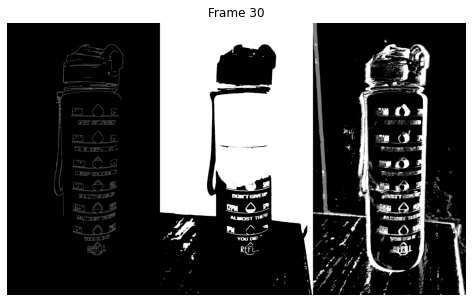

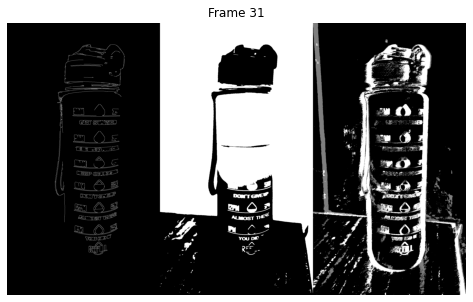

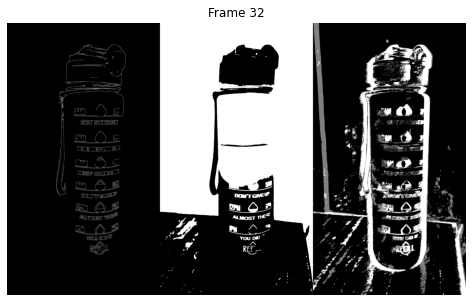

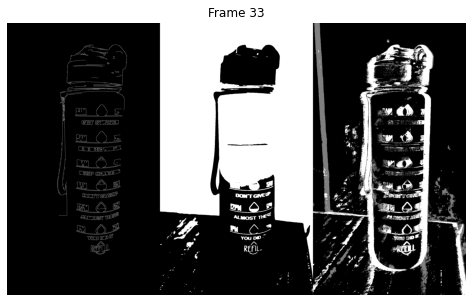

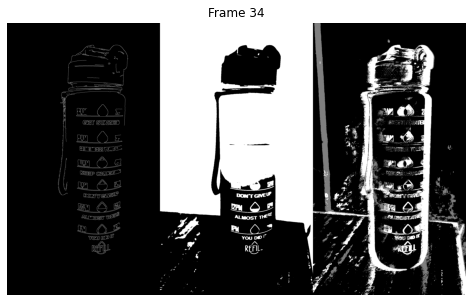

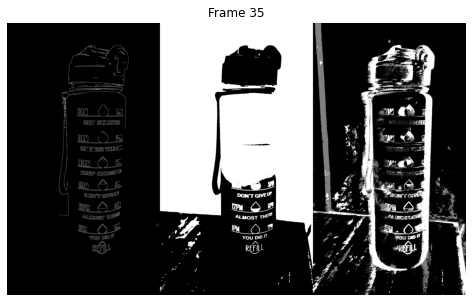

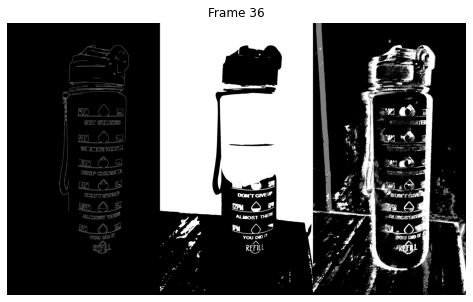

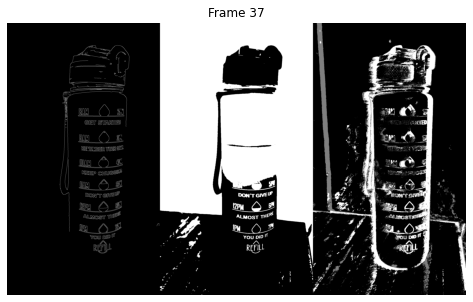

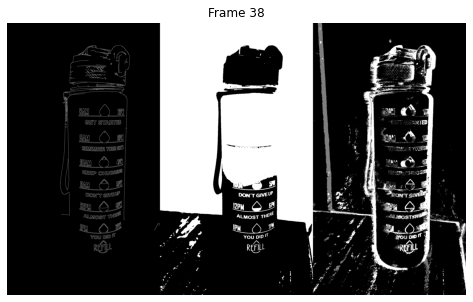

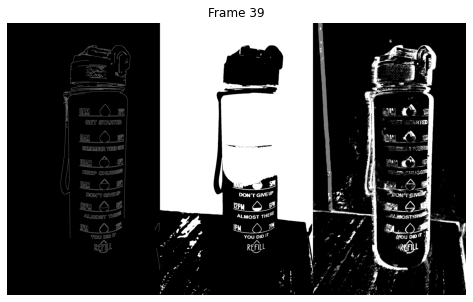

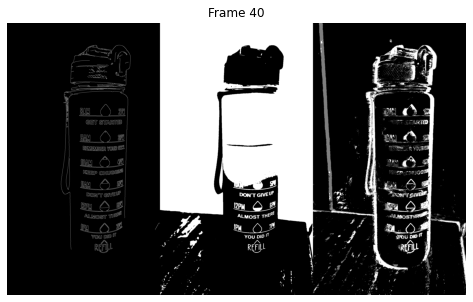

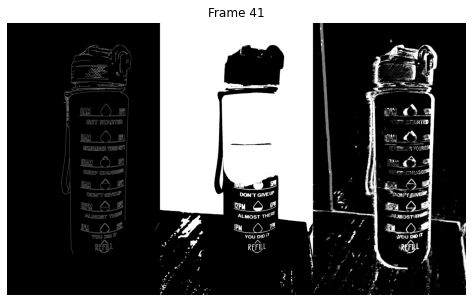

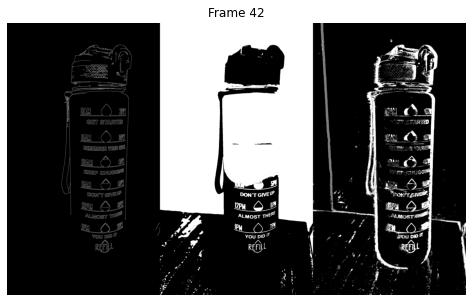

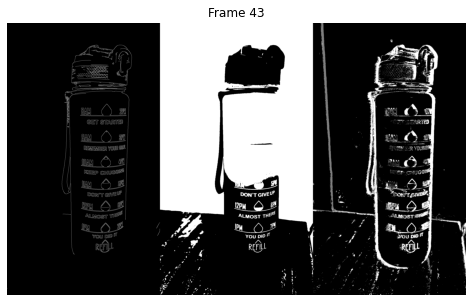

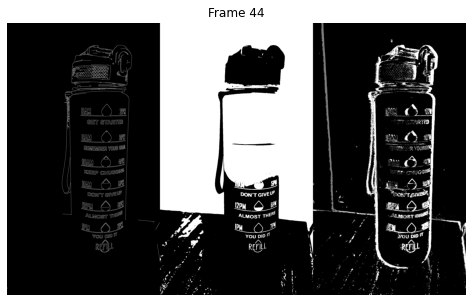

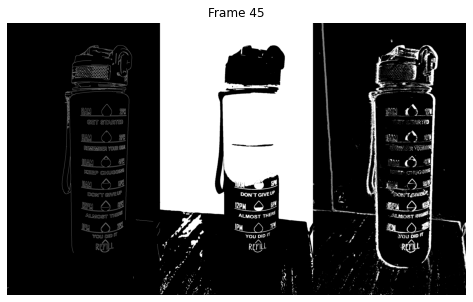

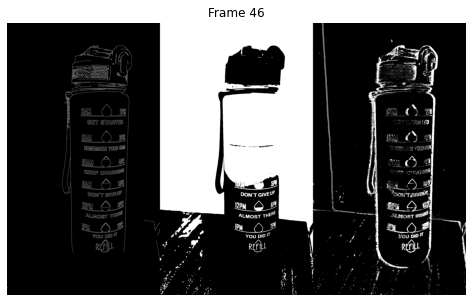

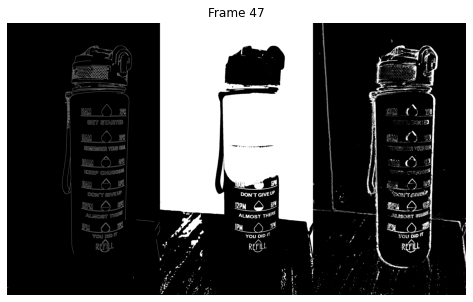

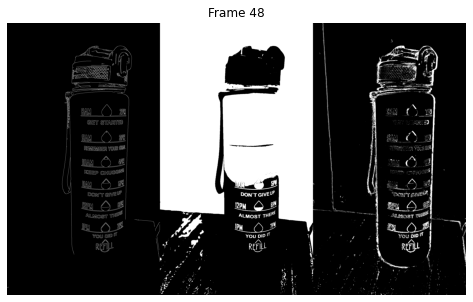

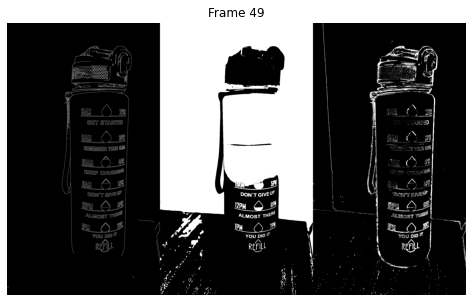

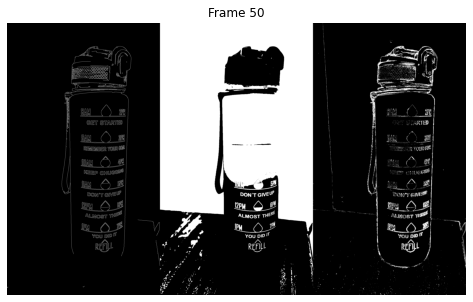

In [43]:
# Process each frame
frame_count = 0
while True:
    ret, frame = cap.read()
    if not ret:
        print("Finished processing frames.")
        break
    
    # Convert frame to grayscale for processing
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Apply edge detection
    edges = cv2.Canny(gray, 50, 150)

    # Apply color thresholding to segment regions of interest
    _, thresholded = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

    # Background subtraction to find moving objects (foreground vs. background)
    fgmask = fgbg.apply(frame)

    # Combine results for visualization (edges, thresholded, and foreground mask)
    combined = np.hstack((edges, thresholded, fgmask))

    # Display the segmented results
    plt.figure(figsize=(10, 5))
    plt.imshow(combined, cmap='gray')
    plt.title(f"Frame {frame_count}")
    plt.axis('off')
    plt.show()

    frame_count += 1

   
    if frame_count > 50:  
        break

# Release video capture object
cap.release()

4. Scene Cut Detection:
   - Use pixel-based comparison or histogram differences between consecutive frames to detect abrupt changes (hard cuts).
   - Detect gradual scene transitions (Soft cuts) by analyzing frame-to-frame intensity changes over time.

5. Mark Scene Cuts:
   - Highlight the frames where scene cuts are detected.
   - Create a summary displaying the detected scene boundaries.

In [44]:
# Function to compute Mean Squared Error (MSE) between two frames
def calculate_mse(frame1, frame2):
    diff = cv2.absdiff(frame1, frame2)
    mse = np.sum(diff ** 2) / float(frame1.shape[0] * frame1.shape[1])
    return mse

In [45]:
# Function to compute histogram comparison (Chi-square)
def calculate_histogram_diff(frame1, frame2):
    # Convert frames to grayscale
    gray1 = cv2.cvtColor(frame1, cv2.COLOR_BGR2GRAY)
    gray2 = cv2.cvtColor(frame2, cv2.COLOR_BGR2GRAY)
    
    # Calculate histograms
    hist1 = cv2.calcHist([gray1], [0], None, [256], [0, 256])
    hist2 = cv2.calcHist([gray2], [0], None, [256], [0, 256])
    
    # Normalize histograms
    hist1 /= hist1.sum()
    hist2 /= hist2.sum()
    
    # Calculate chi-square distance between histograms
    hist_diff = cv2.compareHist(hist1, hist2, cv2.HISTCMP_CHISQR)
    return hist_diff

In [46]:
# Initialize variables
prev_frame = None
frame_count = 0
hard_cut_threshold = 300000  
soft_cut_threshold = 0.5   

In [47]:
scene_cuts = []  # To store frame numbers where scene cuts are detected

# Process each frame
while True:
    ret, frame = cap.read()
    if not ret:
        print("Finished processing frames.")
        break
    
    if prev_frame is not None:
        # 1. Hard Cut Detection: MSE or Histogram Difference
        mse = calculate_mse(prev_frame, frame)
        hist_diff = calculate_histogram_diff(prev_frame, frame)
        
        # Check for hard cut (significant MSE difference)
        if mse > hard_cut_threshold:
            print(f"Hard cut detected at frame {frame_count}")
            scene_cuts.append(frame_count)
            cv2.putText(frame, "Hard Cut Detected", (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2, cv2.LINE_AA)
        
        # Check for soft cut (significant histogram difference)
        if hist_diff > soft_cut_threshold:
            print(f"Soft cut detected at frame {frame_count}")
            scene_cuts.append(frame_count)
            cv2.putText(frame, "Soft Cut Detected", (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2, cv2.LINE_AA)
        
        # Highlight the detected cuts
        if mse > hard_cut_threshold or hist_diff > soft_cut_threshold:
            # Draw a bounding box around the frame
            cv2.rectangle(frame, (10, 10), (frame.shape[1] - 10, frame.shape[0] - 10), (0, 255, 255), 5)

        # Display the frame with the scene cuts marked
        plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
        plt.axis('off')
        plt.show()
    
    prev_frame = frame
    frame_count += 1

    # Break after processing a certain number of frames to avoid excessive display
    if frame_count > 50:  # Adjust this value based on the video length
        break

# Release video capture object
cap.release()

# Display the summary of scene cuts
print("\nDetected Scene Cuts at frames:")
print(scene_cuts)

# Save the scene cut summary to a file (optional)
with open("scene_cut_summary.txt", "w") as f:
    f.write("Detected Scene Cuts:\n")
    for cut in scene_cuts:
        f.write(f"Frame {cut}\n")


Finished processing frames.

Detected Scene Cuts at frames:
[]
